# Statistical Machine Learning Exercise Sheet 5
- Laura Haege
- Philipp Noel von Bachmann, Matrikelnummer: 4116220

## Exercise 9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg


### (a)

In [2]:
def LDA_feature(X,Y):
    # rename y features to enable indexing
    y_indices = np.array([np.squeeze(np.where(y_i == np.unique(Y))) for y_i in Y])
    # compute parameters
    mu = np.mean(X, axis=0)
    mu_class = np.array([np.mean(X[Y==k, :], axis=0) for k in np.unique(Y)])
    within = np.sum([np.outer(X[index, :] - mu_class[y_index], X[index, :] - mu_class[y_index]) for index, y_index in enumerate(y_indices)], axis=0)
    between_class = np.sum([np.count_nonzero(Y==y_i)* np.outer(mu_class_i - mu, mu_class_i - mu) for mu_class_i, y_i in zip(mu_class, np.unique(Y))], axis=0)
    # comute eigennvalues, vectors and sort them
    eigen_values, eigen_vectors = scipy.linalg.eig(np.linalg.inv(within).dot(between_class))
    eigen_vectors = eigen_vectors[:,np.argsort(eigen_values)]
    # project training points on the largest two eigenvectors
    eigen_vectors = eigen_vectors[:,-(len(np.unique(Y)))+1:]
    return eigen_vectors, X @ eigen_vectors

## (b)

To make the problem "nicer", we incorporate the bias term in the weights by appending 1 to all vectors in the end and add the bias b to the weight vector. Now we can rewrite $sign(w^T X + b) = Y$ as $sign(w^{*^T} X^*) = Y$.

1. There exists a set of $d+1$ points for which every labeling can be learnt by a linear classifier

Choose the standard basis $e_1, ..., e_d \in \mathbb{R}^d$.  Note that the reformulation of the problem above changes $e_i$ etc from $\in\mathbb{R}^d$ to $\in\mathbb{R}^{d+1} = \mathbb{R}^n$ and also gives rise to the vector $e_n$ of zeros with just the one from the bias in the end.

With this points, the transformation results in $sign(w^{*^T}_i X^*_i) = sign(w_i^* + b) = Y_i$

Given an arbitrary labeling $Y \in \{ 0, 1 \}^n$, now choose:
$w^*_n = b = Y_n$ and for $i \in \{1, ..., n-1\}$: $w_i^* = Y_i - b$

Clearly this achieves the correct labeling for $e_n$ and for the other $e_i$,  $sign(w^{*^T}_i X^*_i) = sign(Y_i - b + b) = Y_i$ by construction, which also satisfies the labeling. Therefore there exists a set of size $d+1$ for that the classifier can achieve an arbitrary labeling.




2. any set of $d+2$ points cannot be learnt

Suppose there exists $d+2$ such points. Then $X^*$ is of the size $\mathbb{R}^{d+1 \times d+2}$ for any set of points. This means that the $rank(X^*) = min(d+1, d+2)=d+1$, and as $^*$ has $d+2$ columns, the columns must be linearly dependent.

Now denote $d_i$ as the datapoint that can be written as a linear combination of the others, $d_i = \sum_{j \in \{1,...,d+2\}, j\neq i}\alpha_j d_j$. As we have seen in 1., if we just classify all points except $d_i$, all parameters of $w^*$ will already by determined and it follows that the transformation of $d_i$ is given as $p = sign(\sum_{j \in \{1,...,d+2\}, j\neq i} w^*_j)$. Now choose $Y_j = -p$. This assignment cannot be achieved and therefore the classifier cannot have dimension $d+2$. 


### (c)

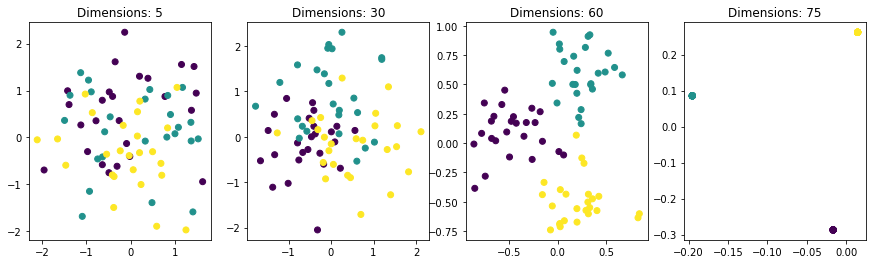

In [8]:
dimensions = [5, 30, 60, 75]
samples=25
fig, axs = plt.subplots(1, len(dimensions))
for index, d in enumerate(dimensions):
    X = np.random.randn(3*samples,d)
    Y = np.repeat([1,2,3], samples)
    vectors, values = LDA_feature(X, Y)
    axs[index].scatter(values[:,0], values[:,1], c=Y)
    axs[index].set_title(f"Dimensions: {d}")
    axs[index].figure.set_size_inches(15, 4)

- As the samples of 3 classes are distributed randomly and more important identically, all classes come from the same distributiona and therefore we should not be able to find a good separation for the data.
- However as we have seen in (b), the more dimensions the feature space has the more data points are we able to distinguish in general. Therefore a high number of dimensions should still enable us to separate the data.
- We can see in the plots that as for a fixed number of datapoints, more features enable us to separate the data better, which is exactly what we have proven in (b).

### (d)

In [4]:
# load the data

data = np.load("digits389.npy", allow_pickle=True).item()
X_train = data["Xtrain"]
Y_train = data["Ytrain"]
X_test = data["Xtest"]
Y_test = data["Ytest"]

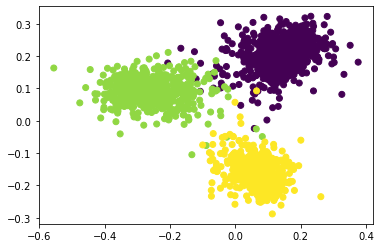

In [5]:
plt.figure()
vecs, vals = LDA_feature(X_train, Y_train)
plt.scatter(vals[:, 0], vals[:, 1], c=Y_train);

We can see that the LDA was able to separate the 3 classes well, there is only minor overlap and most of the points in one class are close to each other.

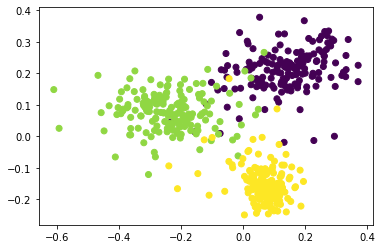

In [6]:
plt.figure()
vals = X_test @ vecs
plt.scatter(vals[:, 0], vals[:, 1], c=Y_test);

The test set follows the overall trend from the training set that classes get separated. However, there is more overlap in the test than the training set, and the within-class distance is slightly higher (more outliers). In total, it seems that the embedding generalizes, although with a small generalization error (what is to be expected for new, unseen data).